In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from functions_parameters.universal_parameters import a, b
from functions_parameters.tools import rot_symm_m_check_d, translation_check_d, array_print
from itertools import product

In [2]:
final_result = np.load('schf_filling_0p8_t_4_em4_random_basis_mesh_30_2_2.npz')


final_ground_state_e_diff_density = final_result['gse']
final_density = final_result['d']
final_bond = final_result['bond']
final_e_difference = final_result['e_diff']
final_c_difference = final_result['c_diff']
final_e_fermi = final_result['e_fermi']
final_iteration = final_result['iters']
any_bi_fail = final_result['any_bi_fail']

u_arr = final_result['u']
v1_arr = u_arr
u_mesh, v1_mesh = np.meshgrid(u_arr, v1_arr, indexing = 'ij')

In [3]:
np.max(final_c_difference)

np.float64(0.2487254689016784)

In [4]:
np.max(final_e_difference)

np.float64(6.228658745843774e-05)

In [5]:
np.all(np.logical_not(any_bi_fail))

np.True_

### Some points do not converge

In [6]:
index_c_diff = np.where(np.abs(final_c_difference)>1E-4)
final_ground_state_e_diff_density[index_c_diff] = 0
index_e_diff = np.where(np.abs(final_e_difference)>1E-4)
final_ground_state_e_diff_density[index_e_diff] = 0

In [7]:
index_c_diff

(array([ 1,  2,  2,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
         6,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,
         9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15]),
 array([ 6,  8,  9,  0,  0,  0,  0,  0,  0,  5,  8,  0,  0,  0,  0,  0,  0,
         9,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  8,  0,  0,
         0,  0,  0,  0,  8,  8, 13,  0,  0,  0,  0,  0,  0,  8,  8,  0,  0,
         0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  8,  0,  0,  0,  0,  0,  0,
         1,  1,  1,  1,  1,  1,  8,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
         1,  1,  8,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,
         0,  0,  0,  0,  1,  1,  1,  1

In [8]:
final_c_difference[index_c_diff]

array([2.74672474e-03, 9.75054707e-04, 1.23727645e-04, 1.28025935e-02,
       1.28025934e-02, 1.80877457e-02, 1.80877462e-02, 1.80877462e-02,
       1.80877462e-02, 6.15164209e-04, 1.16819520e-04, 4.49776075e-02,
       4.49776075e-02, 4.49776075e-02, 4.49776075e-02, 4.49776075e-02,
       4.49776075e-02, 4.35180159e-04, 7.50054686e-02, 7.50054686e-02,
       7.50054686e-02, 7.50054686e-02, 7.50054686e-02, 7.50054686e-02,
       5.16559830e-04, 1.09952978e-01, 1.09952978e-01, 1.09952978e-01,
       1.09952978e-01, 1.09952978e-01, 1.09952978e-01, 2.98099462e-04,
       1.42966533e-01, 1.42966533e-01, 1.42966533e-01, 1.42966533e-01,
       1.42966533e-01, 1.42966533e-01, 3.08930399e-04, 3.88187004e-04,
       4.55117696e-04, 1.77505859e-01, 1.77505859e-01, 1.77505859e-01,
       1.77505859e-01, 1.77505859e-01, 1.77505859e-01, 3.91653275e-04,
       1.99807887e-04, 2.10401490e-01, 2.10401490e-01, 2.10401490e-01,
       2.10401490e-01, 2.10401490e-01, 2.10401490e-01, 2.12288414e-02,
      

### Phase Analysis

In [9]:
translation_a1 = np.kron(np.array([[0,0,1,0],
                           [0,0,0,1],
                           [1,0,0,0],
                           [0,1,0,0]]), np.eye(3))
translation_a2 = np.kron(np.array([[0,1,0,0],
                           [1,0,0,0],
                           [0,0,0,1],
                           [0,0,1,0]]), np.eye(3))
translation_a3 = translation_a1 @ translation_a2
c_6_uc = np.array([[0,0,1],
                   [1,0,0],
                   [0,1,0]])
c_3_uc = c_6_uc@c_6_uc
c_2_uc = c_6_uc @ c_3_uc
c_6_2uc = np.zeros((12, 12))
c_6_2uc[0, 2] = 1
c_6_2uc[1, 6] = 1
c_6_2uc[2, 7] = 1
c_6_2uc[3, 8] = 1
c_6_2uc[4, 0] = 1
c_6_2uc[5, 1] = 1
c_6_2uc[6, -1] = 1
c_6_2uc[7, 3] = 1
c_6_2uc[8, 4] = 1
c_6_2uc[9, 5] = 1
c_6_2uc[10, -3] = 1
c_6_2uc[11, -2] = 1

c_6_2uc = np.moveaxis(np.reshape(c_6_2uc, (2, 2, 3, 2, 2, 3)), (0, 3), (1, 4)).reshape(12, 12)
c_3_2uc = c_6_2uc @ c_6_2uc
c_2_2uc = c_3_2uc @ c_6_2uc

In [10]:
# try define a translated rotation symmetry check operator such that we can check if the phase is genuine stripe orders.
c_6_2uc_gamma = np.zeros((12, 12))
c_6_2uc_gamma[1, 0] = 1
c_6_2uc_gamma[2, 1] = 1
c_6_2uc_gamma[6, 2] = 1
c_6_2uc_gamma[7, 3] = 1
c_6_2uc_gamma[8, 4] = 1
c_6_2uc_gamma[0, 5] = 1
c_6_2uc_gamma[10, 6] = 1
c_6_2uc_gamma[11, 7] = 1
c_6_2uc_gamma[3, 8] = 1
c_6_2uc_gamma[4, 9] = 1
c_6_2uc_gamma[5, 10] = 1
c_6_2uc_gamma[9, 11] = 1

In [11]:
c_6_2uc_y=np.zeros((12, 12))
c_6_2uc_y[10, 0] = 1
c_6_2uc_y[11, 1] = 1
c_6_2uc_y[3, 2] = 1
c_6_2uc_y[4, 3] = 1
c_6_2uc_y[5, 4] = 1
c_6_2uc_y[9, 5] = 1
c_6_2uc_y[1, 6] = 1
c_6_2uc_y[2, 7] = 1
c_6_2uc_y[6, 8] = 1
c_6_2uc_y[7, 9] = 1
c_6_2uc_y[8, 10] = 1
c_6_2uc_y[0, 11] = 1

In [12]:
c_6_2uc_x=np.zeros((12, 12))
c_6_2uc_x[4, 0] = 1
c_6_2uc_x[5, 1] = 1
c_6_2uc_x[9, 2] = 1
c_6_2uc_x[10, 3] = 1
c_6_2uc_x[11, 4] = 1
c_6_2uc_x[3, 5] = 1
c_6_2uc_x[7, 6] = 1
c_6_2uc_x[8, 7] = 1
c_6_2uc_x[0, 8] = 1
c_6_2uc_x[1, 9] = 1
c_6_2uc_x[2, 10] = 1
c_6_2uc_x[6, 11] = 1

In [13]:
c_3_2uc_gamma = c_6_2uc_gamma @ c_6_2uc_gamma
c_2_2uc_gamma = c_3_2uc_gamma @ c_6_2uc_gamma
c_3_2uc_x = c_6_2uc_x @ c_6_2uc_x
c_2_2uc_x = c_3_2uc_x @ c_6_2uc_x
c_3_2uc_y = c_6_2uc_y @ c_6_2uc_y
c_2_2uc_y = c_3_2uc_y @ c_6_2uc_y

In [14]:
ts_phase = ['', 'stripe', '2*2']
nematic_phase = [' R symmetric', ' C3 charge nematic', ' C2 charge nematic', ' no R']
Magnetism_phase = [' +', ' FM', ' Ferri', ' AFM']

phase_list_final = list(i+j+m for i,j,m in product(ts_phase, nematic_phase, Magnetism_phase))

In [15]:
sorted_ground_state_e_index = np.argsort(final_ground_state_e_diff_density, axis=2)
sorted_ground_state_e= np.take_along_axis(final_ground_state_e_diff_density, sorted_ground_state_e_index, axis=2)
sorted_density = np.take_along_axis(final_density, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis], axis=2)
sorted_bond = np.take_along_axis(final_bond, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis,np.newaxis,np.newaxis,np.newaxis], axis=2)
sorted_e_difference = np.take_along_axis(final_e_difference, sorted_ground_state_e_index, axis=2)
sorted_c_difference = np.take_along_axis(final_c_difference, sorted_ground_state_e_index, axis=2)

In [16]:
phase_diagram_based_on_d = np.zeros((v1_mesh.shape))

threshold = 1E-2
for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        d_ij = sorted_density[i,j,0]
        ts_recording = np.zeros((3))
        rs_recording = np.zeros((4))
        m_recording = np.zeros((4))
        ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
        if np.all(ts_diff_arr<threshold):
            ts_recording[0] = 1
        elif np.all(ts_diff_arr>threshold):
            ts_recording[-1] = 1
        else:
            ts_recording[1] = 1
        if ts_recording[0]<1.5:
            d_ij = d_ij[:,:3]
            c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_uc, c_3_uc, c_2_uc)
        else:
            c6_diff_o, c3_diff_o, c2_diff_o, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_2uc, c_3_2uc, c_2_2uc)
            c6_diff_x, c3_diff_x, c2_diff_x, _ = rot_symm_m_check_d(d_ij, c_6_2uc_x, c_3_2uc_x, c_2_2uc_x)
            c6_diff_y, c3_diff_y, c2_diff_y, _ = rot_symm_m_check_d(d_ij, c_6_2uc_y, c_3_2uc_y, c_2_2uc_y)    
            c6_diff_gamma, c3_diff_gamma, c2_diff_gamma, _ = rot_symm_m_check_d(d_ij, c_6_2uc_gamma, c_3_2uc_gamma, c_2_2uc_gamma)
            c6_diff = np.min(np.abs(np.array([c6_diff, c6_diff_x, c6_diff_y, c6_diff_gamma])))
            c3_diff = np.min(np.abs(np.array([c3_diff, c3_diff_x, c3_diff_y, c3_diff_gamma])))
            c2_diff = np.min(np.abs(np.array([c2_diff, c2_diff_x, c2_diff_y, c2_diff_gamma])))
        if c6_diff<threshold:
            rs_recording[0] = 1
        elif c6_diff>threshold and c3_diff<threshold:
            rs_recording[1] = 1
        elif c2_diff<threshold and c6_diff>threshold:
            rs_recording[2] = 1
        else:
            rs_recording[3] = 1
        if np.max(np.abs(magnetism_arr)) > threshold:
            if np.all(np.sign(np.real(magnetism_arr)) == 1) or np.all(np.sign(np.real(magnetism_arr)) == -1):
                m_recording[1] = 1
            else:
                net_m = np.sum(np.real(magnetism_arr))
                if np.abs(net_m) <= threshold:
                    m_recording[3] = 1
                else:
                    m_recording[2] = 1
        else:
            m_recording[0] = 1
        phase_arr = np.kron(ts_recording,rs_recording)
        phase_arr = np.kron(phase_arr,m_recording)
        phase = np.where(phase_arr>0.5)[0][0]
        
        phase_diagram_based_on_d[i,j]=phase

Text(0.5, 1.0, 'filling = 0.8')

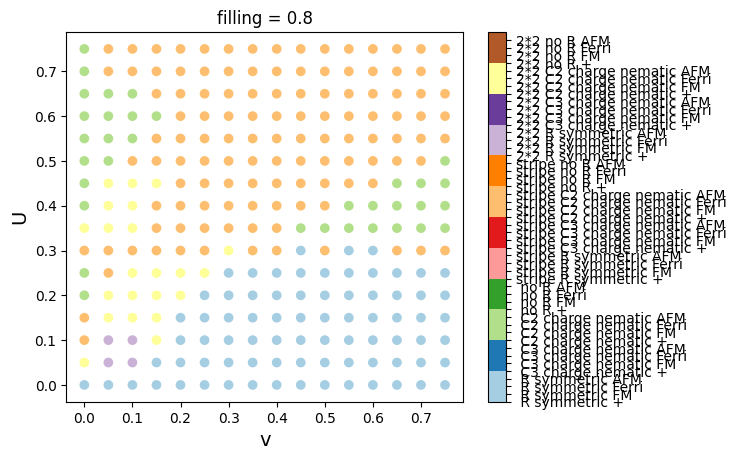

In [17]:
colorbar_ticks_combined = np.arange(len(phase_list_final))
cmap = plt.get_cmap("Paired", len(phase_list_final))
# plt.pcolormesh(e_fermi_mesh, u_mesh, phase_diagram_combined_op.T, cmap="Paired")
plt.scatter(u_mesh, v1_mesh, c=phase_diagram_based_on_d, cmap=cmap,vmin=0, vmax=len(phase_list_final))
# plt.xlabel(r'$E_{f}$', size = '14')
plt.xlabel('v', size = '14')
plt.ylabel('U', size = '14')
# plt.xlim(3.8,6)
colorbar_ticks = np.arange(len(phase_list_final))
cbar = plt.colorbar()
cbar.set_ticks(colorbar_ticks)
cbar.set_ticklabels(phase_list_final)
plt.title('filling = 0.8')

In [18]:
unique_phase_index = np.unique(phase_diagram_based_on_d)
unique_phase_name = [phase_list_final[i] for i in np.int_(unique_phase_index)]
filtered_phase_diagram = np.zeros(phase_diagram_based_on_d.shape)
for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        filtered_phase_diagram[i,j] = np.where(unique_phase_index==phase_diagram_based_on_d[i,j])[0][0]

Text(0.5, 1.0, 'filling = 0.8')

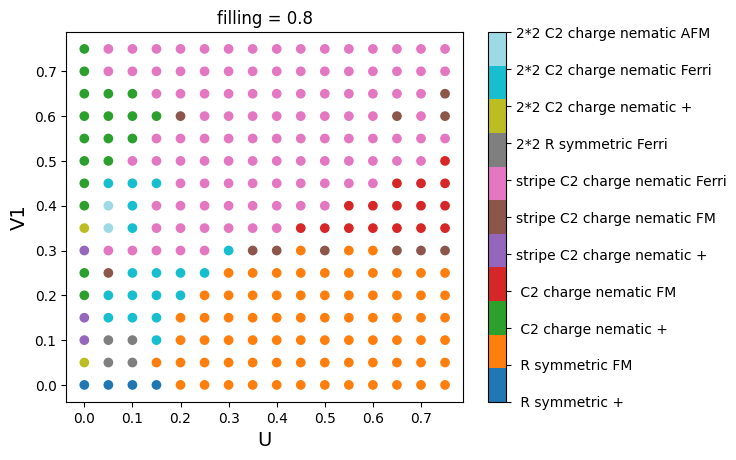

In [19]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(u_mesh, v1_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('U', size = '14')
plt.ylabel('V1', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

Text(0.5, 1.0, 'filling = 0.8')

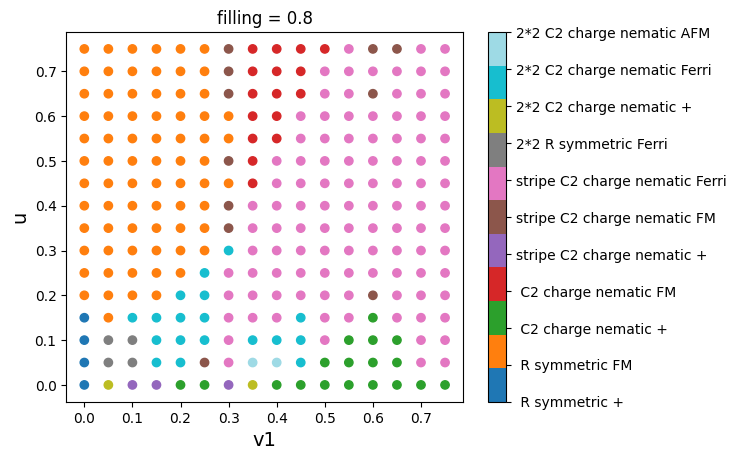

In [20]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(v1_mesh, u_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('v1', size = '14')
plt.ylabel('u', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

In [21]:
sorted_ground_state_e[-1,6]

array([-0.23065386, -0.23063069, -0.23063069, -0.23063068, -0.23063068,
       -0.23062578, -0.23062577, -0.23062577, -0.2306201 , -0.2306201 ,
       -0.2306201 , -0.2306201 , -0.22928611, -0.22928611, -0.06961961,
       -0.06961961, -0.06961961, -0.06961961, -0.02339453, -0.02339453])

# check if any of the points on the phase diagram in under convergence

In [22]:
np.where(np.logical_and(sorted_e_difference[:,:,0]>1E-8, sorted_c_difference[:,:,0]>1E-7))

(array([3]), array([9]))

In [23]:
sorted_e_difference[3,9,0]

np.float64(4.030017941580866e-08)

In [24]:
sorted_c_difference[3,9,0]

np.float64(1.5047567644616011e-05)

# rerun is not efficient for the whole diagram, let's do single point check for scattering points

In [25]:
import jax
import jax.numpy as jnp
import numpy as np
import os
from itertools import product

from functions_parameters.jax_schf_kernel import schf_fixed_filling_pmap_over_u, schf_single_job
from functions_parameters.jax_schf_helpers import *
from functions_parameters.universal_parameters import a, b
from functions_parameters.bond_table_generator import build_buckets_per_shell

# ---- numeric mode ----
from jax import config as _jax_config
_jax_config.update("jax_enable_x64", True)  # use float64 by default

Array = jnp.ndarray
PyTree = Any

'''
preparation:
'''
# order is important. for unit cell (0,0), (0,1), (1,0), (1,1), sublattice a, b and c respectively
basis_frac_o = np.array([[1/4, 0], [1/4, 1/4], [0, 1/4]])
basis_frac_1 = basis_frac_o + np.array([0, 1/2])
basis_frac_2 = basis_frac_o + np.array([1/2, 0])
basis_frac_3 = basis_frac_o + np.array([1/2, 1/2])
basis_frac = np.concatenate((basis_frac_o, basis_frac_1, basis_frac_2, basis_frac_3), axis=0)
norb = basis_frac.shape[0]

# halve the num_k_mesh
num_k_mesh = 60//2
# new translation vector
a = a*2
b = b/2

# k_mesh
b_0 = np.linspace(-b[0] / 2, b[0] / 2, num_k_mesh, endpoint=False)
b_1 = np.linspace(-b[1] / 2, b[1] / 2, num_k_mesh, endpoint=False)
k_mesh_points = np.vstack([v1 + v2 for v1, v2 in product(b_0, b_1)])
num_k_points = k_mesh_points.shape[0]

radii, a_lists, deltas = build_buckets_per_shell(a, basis_frac, 2)

# in this case, as both TB model and interaction, we include up to NNN, the a_list and deltas are the same
# calculate the correlation matrix
temperature = 4E-4
# filling has to be 4 times before, as we have 4 unit cells in the 2x2 square lattice
filling = 0.4*4
mu = 2
t_nn = 1
t_nnn = -0.025
t_arr = np.array([t_nn, t_nnn])

phase_pos, phase_neg = precompute_k_phase_tables(deltas, a, k_mesh_points)
Htb, e_all, v_all, v_all_dagger = hk_all_k_from_phases(mu, a_lists, t_arr, phase_neg)
dict_ref = prepare_reference_state(filling, a_lists, Htb, e_all, v_all, v_all_dagger, phase_pos, phase_neg, temperature)

Htb = jnp.stack((jnp.asarray(Htb), jnp.asarray(Htb)), axis=1)
filling = filling * 2
a_lists = jnp.asarray(a_lists)
phase_pos = jnp.asarray(phase_pos)
phase_neg = jnp.asarray(phase_neg)

### interchange point (-4,6) and (-3,6)

In [26]:
u_index_input = -3
v_index_input = 6
input_d = sorted_density[u_index_input,v_index_input,0]
input_bond = sorted_bond[u_index_input,v_index_input,0]

u_index = -4
v_index = 6
u_arr = jnp.array([u_arr[u_index]])
v1_arr = jnp.array([v1_arr[v_index]])
v2_arr = v1_arr.copy()
v_arr = jnp.concatenate([v1_arr, v2_arr])
nshell = v_arr.shape[0]
ndeltas = deltas.shape[0]

res = schf_single_job(Htb, a_lists, phase_pos, phase_neg, dict_ref, input_d, input_bond, filling, u_arr, v_arr, temperature)


In [27]:
res['gse'], res['e_diff'], res['c_diff']

(Array([-0.19865386], dtype=float64),
 Array(2.70391931e-10, dtype=float64),
 Array(6.49793769e-08, dtype=float64))

In [ ]:
sorted_ground_state_e[u_index,v_index,0]

np.float64(-0.19863068403266398)

In [50]:
res['gse']<sorted_ground_state_e[u_index,v_index,0]

Array([ True], dtype=bool)

#### new state has lower energy, (-4,6) should be stripe

### interchange point (-5,6) and (-6,6)

In [29]:
u_index_input = -6
v_index_input = 6
input_d = sorted_density[u_index_input,v_index_input,0]
input_bond = sorted_bond[u_index_input,v_index_input,0]

u_index = -5
v_index = 6
u_arr = jnp.array([u_arr[u_index]])
v1_arr = jnp.array([v1_arr[v_index]])
v2_arr = v1_arr.copy()
v_arr = jnp.concatenate([v1_arr, v2_arr])
nshell = v_arr.shape[0]
ndeltas = deltas.shape[0]

res = schf_single_job(Htb, a_lists, phase_pos, phase_neg, dict_ref, input_d, input_bond, filling, u_arr, v_arr, temperature)

In [30]:
res['gse'], res['c_diff'], res['e_diff']

(Array([-0.19865386], dtype=float64),
 Array(6.44022894e-08, dtype=float64),
 Array(4.9948512e-10, dtype=float64))

In [31]:
sorted_ground_state_e[u_index,v_index,0]

np.float64(-0.18796401711375094)

In [ ]:
res['gse']<sorted_ground_state_e[u_index,v_index,0]

#### new state has lower energy, (-5,6) should be stripe

## Select phase for rerun

In [32]:
selected_indexes = [(-1,6,0), (-4,6,0), (6,6,0), (5,6,0), (0,1,0), (0,2,0), (0,4,0), (1,7,0), (-3,2,0), (4,-4,0)]

In [33]:
selected_d = np.zeros((len(selected_indexes),2,12), dtype=np.complex128)
selected_bond = np.zeros((len(selected_indexes),)+sorted_bond[0,0,0].shape, dtype=np.complex128)
count = 0
for index in selected_indexes:
    i = index[0]
    j = index[1]
    k = index[2]
    selected_d[count] = sorted_density[i,j,k]
    selected_bond[count] = sorted_bond[i,j,k]
    count += 1

In [34]:
np.savez_compressed("filling_0p8_rerun_basis_2_2.npz",
    d = selected_d,
    bond = selected_bond,
)

### Check the degeneracy

In [35]:
# first find if there are energy states that are highly degenerate as the known ground state while in the different phase
states_index = np.where(np.logical_and(sorted_ground_state_e - sorted_ground_state_e[:,:,0][:,:,np.newaxis]<1E-4, sorted_ground_state_e - sorted_ground_state_e[:,:,0][:,:,np.newaxis]>1E-7))
# then find out the states that are in a different phase than the known ground state
states_index_len = len(states_index[0])
degenerate_state_diagram = -np.ones(final_c_difference.shape, dtype=np.int32)
for index in range(states_index_len):
    i = states_index[0][index]
    j = states_index[1][index]
    k = states_index[2][index]
    print(i,j,k)
    d_ij = sorted_density[i,j,k]
    ts_recording = np.zeros((3))
    rs_recording = np.zeros((4))
    m_recording = np.zeros((4))
    ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
    if np.all(ts_diff_arr<threshold):
        ts_recording[0] = 1
    elif np.all(ts_diff_arr>threshold):
        ts_recording[-1] = 1
    else:
        ts_recording[1] = 1
    if ts_recording[0]<1.5:
        d_ij = d_ij[:,:3]
        c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_uc, c_3_uc, c_2_uc)
    else:
        c6_diff_o, c3_diff_o, c2_diff_o, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_2uc, c_3_2uc, c_2_2uc)
        c6_diff_x, c3_diff_x, c2_diff_x, _ = rot_symm_m_check_d(d_ij, c_6_2uc_x, c_3_2uc_x, c_2_2uc_x)
        c6_diff_y, c3_diff_y, c2_diff_y, _ = rot_symm_m_check_d(d_ij, c_6_2uc_y, c_3_2uc_y, c_2_2uc_y)    
        c6_diff_gamma, c3_diff_gamma, c2_diff_gamma, _ = rot_symm_m_check_d(d_ij, c_6_2uc_gamma, c_3_2uc_gamma, c_2_2uc_gamma)
        c6_diff = np.min(np.abs(np.array([c6_diff, c6_diff_x, c6_diff_y, c6_diff_gamma])))
        c3_diff = np.min(np.abs(np.array([c3_diff, c3_diff_x, c3_diff_y, c3_diff_gamma])))
        c2_diff = np.min(np.abs(np.array([c2_diff, c2_diff_x, c2_diff_y, c2_diff_gamma])))
    if c6_diff<threshold:
        rs_recording[0] = 1
    elif c6_diff>threshold and c3_diff<threshold:
        rs_recording[1] = 1
    elif c2_diff<threshold and c6_diff>threshold:
        rs_recording[2] = 1
    else:
        rs_recording[3] = 1
    if np.max(np.abs(magnetism_arr)) > threshold:
        if np.all(np.sign(np.real(magnetism_arr)) == 1) or np.all(np.sign(np.real(magnetism_arr)) == -1):
            m_recording[1] = 1
        else:
            net_m = np.sum(np.real(magnetism_arr))
            if np.abs(net_m) <= threshold:
                m_recording[3] = 1
            else:
                m_recording[2] = 1
    else:
        m_recording[0] = 1
    phase_arr = np.kron(ts_recording,rs_recording)
    phase_arr = np.kron(phase_arr,m_recording)
    phase = np.where(phase_arr>0.5)[0][0]
    print(phase_list_final[phase])
    if phase != phase_diagram_based_on_d[i,j] and phase not in degenerate_state_diagram[i,j]:
        degenerate_state_diagram[i,j,k]=phase

0 1 6
 R symmetric +
0 1 7
 R symmetric +
0 1 8
 R symmetric +
0 1 9
 R symmetric +
0 1 10
 R symmetric +
0 1 11
 R symmetric +
0 1 12
 R symmetric +
0 1 13
 R symmetric +
0 1 14
 R symmetric +
0 1 15
 R symmetric +
0 1 16
 R symmetric +
0 1 17
 R symmetric +
0 1 18
 R symmetric +
0 1 19
 R symmetric +
1 1 13
stripe R symmetric Ferri
1 11 12
 C2 charge nematic +
1 11 13
 C2 charge nematic +
1 11 14
 C2 charge nematic +
1 11 15
 C2 charge nematic +
1 11 16
 C2 charge nematic +
1 11 17
 C2 charge nematic +
2 7 1
stripe C2 charge nematic Ferri
2 7 2
stripe C2 charge nematic Ferri
2 7 3
stripe C2 charge nematic Ferri
2 7 4
stripe C2 charge nematic Ferri
2 9 1
2*2 C2 charge nematic Ferri
2 9 2
2*2 C2 charge nematic Ferri
2 9 3
2*2 C2 charge nematic Ferri
2 9 4
2*2 C2 charge nematic Ferri
2 9 5
2*2 C2 charge nematic Ferri
2 9 6
2*2 C2 charge nematic Ferri
2 10 3
stripe C2 charge nematic Ferri
2 11 6
 C2 charge nematic +
2 11 7
 C2 charge nematic +
2 11 8
 C2 charge nematic +
2 11 9
 C2 charg

In [36]:
degenerate_state_diagram.dtype

dtype('int32')

In [37]:
degenerate_index = np.where(degenerate_state_diagram>0)


In [38]:
degenerate_index

(array([ 1,  2,  3,  4,  6,  7,  7,  8,  8,  8,  9,  9, 10, 10, 10, 11, 11,
        12, 12, 13, 13, 13, 14, 14, 15, 15]),
 array([ 1,  7,  9, 12,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6]),
 array([13,  1,  9,  1,  1,  2,  4,  1,  3,  5,  3,  5,  1,  3,  4,  2,  3,
         2,  3,  1,  4,  5,  1,  5,  1,  5]))

In [39]:
phase_list_final[np.int32(degenerate_state_diagram[15,6,1])]

' R symmetric FM'

### Comment: just natural phenomena in phase boundary... seems not that surprising.

In [40]:
sorted_c_difference[-1,6]

array([9.57723714e-08, 8.80408971e-08, 9.39048556e-08, 9.77518449e-08,
       9.94321133e-08, 9.92432208e-08, 9.86493300e-08, 9.87237924e-08,
       6.81586382e-08, 7.30744981e-08, 7.42700623e-08, 1.07748921e-10,
       7.26142975e-08, 7.83261218e-08, 8.57446725e-08, 9.53760901e-08,
       9.61164952e-08, 9.10052756e-08, 6.86690177e-08, 6.26569872e-08])

In [41]:
sorted_ground_state_e[-1,-3]

array([-0.55959021, -0.55959021, -0.55959021, -0.5595902 , -0.5177275 ,
       -0.51772722, -0.51772722, -0.49943115, -0.49943115, -0.49943115,
       -0.49943115, -0.49943115, -0.49943115, -0.45520588, -0.45520588,
       -0.4551913 , -0.45511424, -0.45511424, -0.45511424, -0.3933067 ])

In [42]:
sorted_c_difference[-1,-3]

array([9.23274085e-08, 9.08514069e-08, 9.08421221e-08, 9.88846587e-08,
       6.03727537e-08, 9.81803223e-08, 9.97117849e-08, 9.90958241e-08,
       9.50843269e-08, 9.41757940e-08, 9.29283336e-08, 9.24934383e-08,
       9.22451416e-08, 9.17025515e-08, 9.14381846e-08, 8.93528762e-08,
       9.57143078e-08, 9.27026425e-08, 8.98986047e-08, 5.70035769e-09])

In [43]:
TB_index=np.where(filtered_phase_diagram>3)
simplified_phase_diagram = filtered_phase_diagram.copy()
simplified_phase_diagram[TB_index] = 4

simplified_phase_list = unique_phase_name[:4]+['TSB']

In [44]:
from matplotlib.colors import ListedColormap

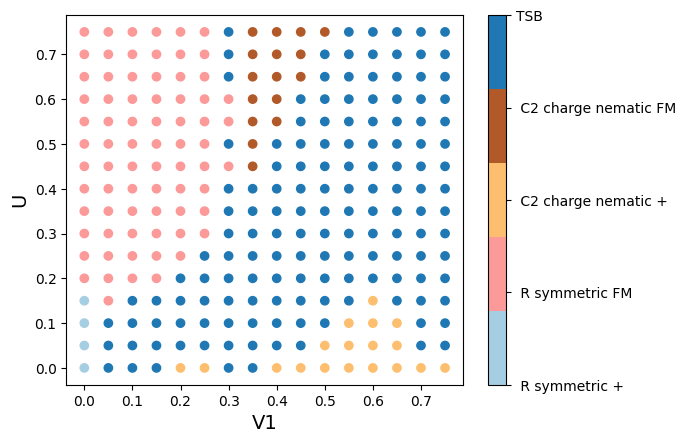

In [45]:
paired = plt.get_cmap("Paired").colors
corlor_index = [0,4,6,11,1]
color_list = [paired[i] for i in corlor_index]

cmap = ListedColormap(color_list)
plt.scatter(v1_mesh, u_mesh, c=simplified_phase_diagram, cmap=cmap)
plt.xlabel('V1', size = '14')
plt.ylabel('U', size = '14')
colorbar_ticks = np.arange(len(simplified_phase_list))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(simplified_phase_list)))
cbar.set_ticklabels(simplified_phase_list)


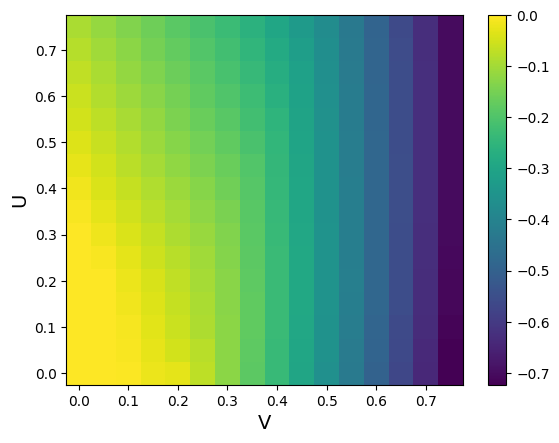

In [46]:
plt.pcolormesh(v1_mesh,u_mesh,sorted_ground_state_e[:,:,0])
plt.xlabel('V', size = '14')
plt.ylabel('U', size = '14')
plt.colorbar()

In [47]:
np.mean(final_iteration)

np.float64(123.9349609375)

In [48]:
np.max(final_iteration)

np.int32(500)

In [49]:
np.min(final_iteration)

np.int32(2)